In [1]:
from code_S3R.utils import data_utils_numpy
import random

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 7)
sns.set()

### Load data

In [2]:
x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = data_utils_numpy.load_data()

In [3]:
x_train[0].shape

(77, 66)

In [4]:
print('train set length :', len(x_train))
print('test set length :', len(x_test))

train set length : 1960
test set length : 837


### Show data characteristics

Such as the lengths of the temporal sequences, before formatting

In [5]:
x_train_L = np.array([
    x_train[i].shape[0] for i in range(len(x_train))
])
x_train_L

array([ 77, 117,  92, ...,  56,  55,  58])

In [6]:
x_test_L = np.array([
    x_test[i].shape[0] for i in range(len(x_test))
])


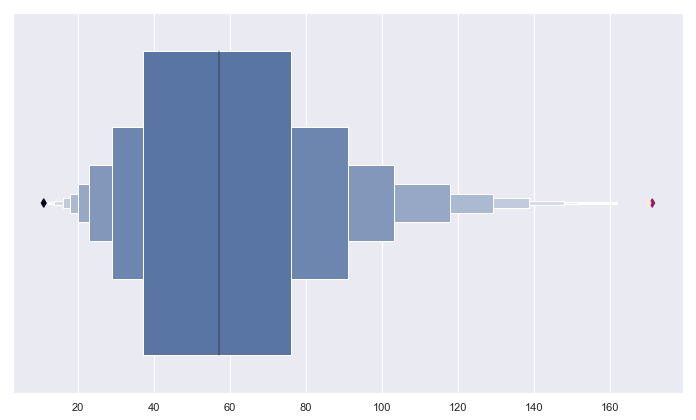

In [7]:
sns.boxenplot(x=x_train_L)

In [8]:
length_df = pd.DataFrame({
    'x_train_length': x_train_L
})
print('95% of the data between :\n', length_df.quantile(0.025), '\nand :\n', length_df.quantile(0.975))

95% of the data between :
 x_train_length    19.0
Name: 0.025, dtype: float64 
and :
 x_train_length    122.0
Name: 0.975, dtype: float64


#### Data normalization
Is data normalization necessary ?
Let's have a look at the first examples

In [9]:
x0_df = pd.DataFrame({
    i: x_train[5][:,i] for i in range(66)
})

x0_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,0.320933,-0.334395,0.426194,0.312790,-0.282179,0.409646,0.298129,-0.319886,0.417768,0.280368,...,0.413008,0.347795,-0.262060,0.394006,0.349342,-0.275566,0.397365,0.352949,-0.289952,0.406596
std,0.013526,0.049750,0.046541,0.019489,0.050519,0.049731,0.014978,0.049434,0.050219,0.010580,...,0.045179,0.021584,0.052398,0.047724,0.018228,0.048716,0.040594,0.017171,0.048119,0.038497
min,0.293144,-0.395285,0.366048,0.274962,-0.343063,0.349631,0.272790,-0.377197,0.350426,0.258955,...,0.358119,0.288938,-0.335696,0.339874,0.293679,-0.345198,0.348107,0.299525,-0.357748,0.359900
25%,0.309879,-0.389139,0.379878,0.299380,-0.338922,0.359844,0.282456,-0.373515,0.366452,0.270421,...,0.371345,0.326832,-0.323120,0.348024,0.331060,-0.331538,0.356910,0.336812,-0.346013,0.367565
50%,0.324966,-0.328580,0.424501,0.313516,-0.276458,0.402267,0.300421,-0.315758,0.418781,0.285862,...,0.390896,0.353636,-0.245532,0.371561,0.357775,-0.263662,0.382771,0.360141,-0.277871,0.393996
75%,0.332549,-0.284584,0.478703,0.332775,-0.232115,0.467052,0.311735,-0.271358,0.474011,0.287849,...,0.466789,0.367766,-0.214801,0.451254,0.362643,-0.231490,0.444128,0.364084,-0.244941,0.450494
max,0.341558,-0.271265,0.484333,0.337665,-0.221155,0.472436,0.325781,-0.254595,0.477645,0.300472,...,0.476437,0.374269,-0.191173,0.461106,0.376187,-0.211109,0.454470,0.382082,-0.219197,0.461128


In [42]:
df_x_train = pd.DataFrame({
    'seq_index':[],
    'channel':[],
    't':[],
    'value':[],
})

for i in range(50):
    j = random.randint(0,len(x_train)-1)
    x = x_train[j]
    print(j)
    for t in range(x.shape[0]):
        seq = x_train[j][t,:]
        seq_df = pd.DataFrame({
            'seq_index':j,
            'channel':range(len(seq)),
            't':t,
            'value':seq,
        })
        df_x_train = pd.concat([df_x_train, seq_df])

df_x_train

885
1589
1475
396
486
96
1192
1819
1466
1019
233
293
732
1468
1522
27
1135
1322
134
127
130
112
777
427
115
145
245
234
1879
1673
1327
864
1866
350
628
232
53
1215
343
1633
164
1282
215
858
689
739
41
1347
1914
413


,channel,seq_index,t,value
0,0.0,885.0,0.0,0.508330
1,1.0,885.0,0.0,-0.365669
2,2.0,885.0,0.0,0.518047
3,3.0,885.0,0.0,0.510357
4,4.0,885.0,0.0,-0.323104
5,5.0,885.0,0.0,0.518049
6,6.0,885.0,0.0,0.489743
7,7.0,885.0,0.0,-0.349968
8,8.0,885.0,0.0,0.520326
9,9.0,885.0,0.0,0.474313


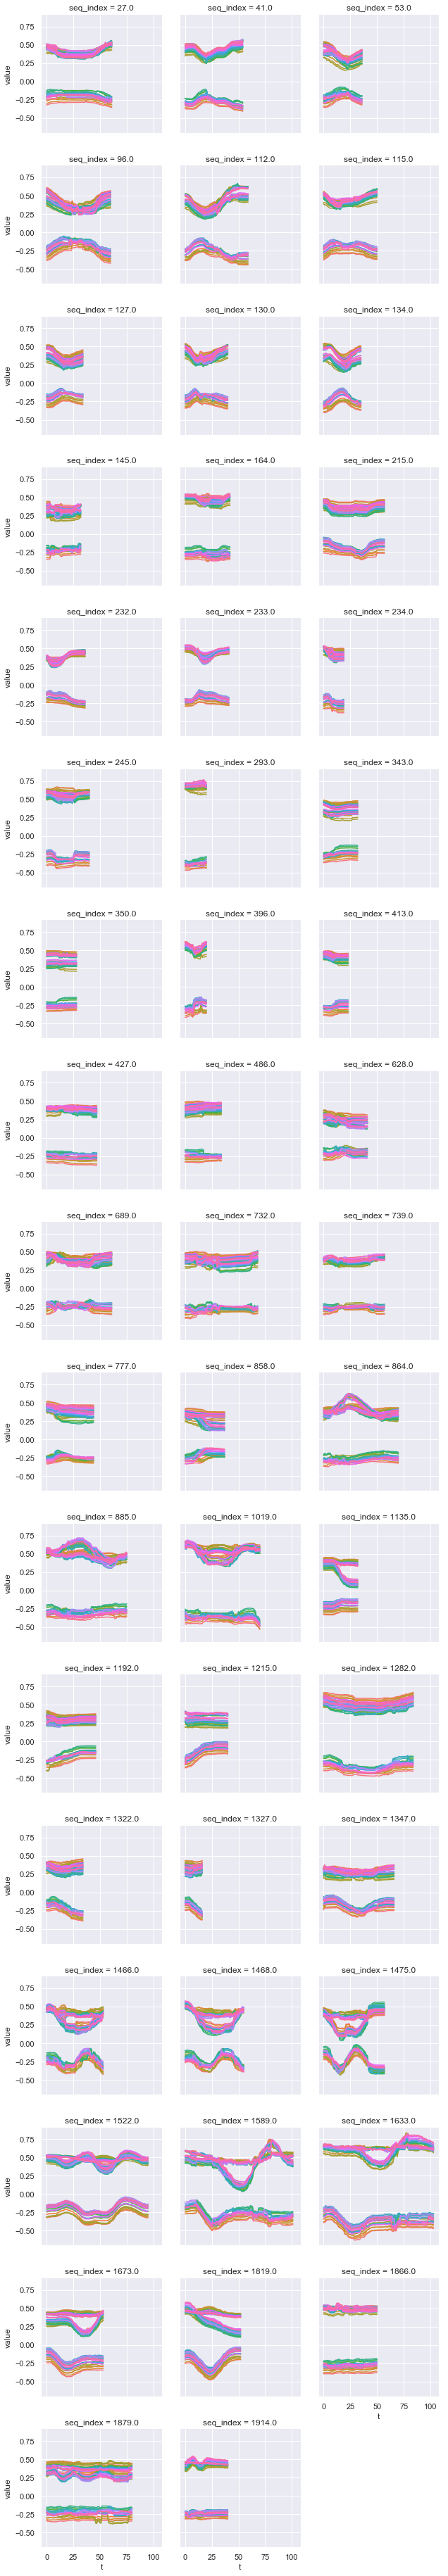

In [44]:
g = sns.FacetGrid(df_x_train, hue='channel', col='seq_index', col_wrap=3)
g.map(plt.plot, 't', 'value')

In [46]:
df_x_train.describe()

,channel,seq_index,t,value
count,166980.000000,166980.000000,166980.000000,166980.000000
mean,32.500000,893.101976,28.844269,0.188525
std,19.050429,619.450290,21.034146,0.326339
min,0.000000,27.000000,0.000000,-0.628326
25%,16.000000,233.000000,12.000000,-0.194461
50%,32.500000,864.000000,25.000000,0.334898
75%,49.000000,1475.000000,41.000000,0.439292
max,65.000000,1914.000000,103.000000,0.838726


In [48]:
df_x_train['seq_index'].unique() # available example indexes

array([ 885., 1589., 1475.,  396.,  486.,   96., 1192., 1819., 1466.,
       1019.,  233.,  293.,  732., 1468., 1522.,   27., 1135., 1322.,
        134.,  127.,  130.,  112.,  777.,  427.,  115.,  145.,  245.,
        234., 1879., 1673., 1327.,  864., 1866.,  350.,  628.,  232.,
         53., 1215.,  343., 1633.,  164., 1282.,  215.,  858.,  689.,
        739.,   41., 1347., 1914.,  413.])

label for index  1475  :  21


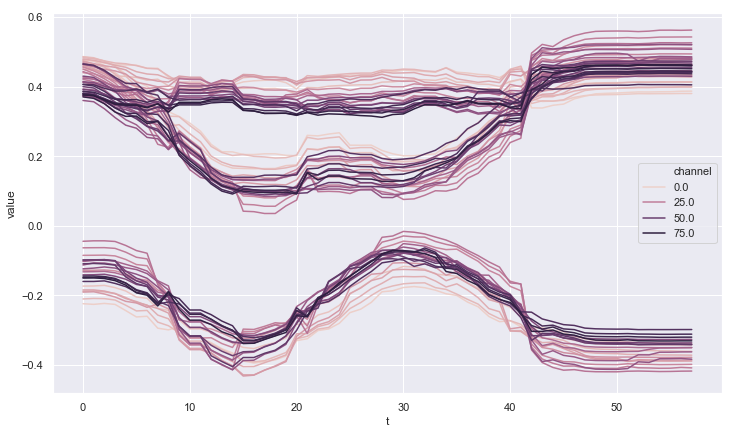

In [53]:
i=1475
plot = sns.lineplot(x='t', y='value', hue='channel', data=df_x_train[df_x_train.seq_index==i])
plot.get_figure().savefig('img_plots/time_sequence.png')

print('label for index ', i, ' : ', y_train_28[i])
# 21 : swipe X (hand)